In [87]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

df = pd.read_csv('all_data.csv')
print(df.head())
print(df.info())#no null data, we must chechk the str country anyways
print(df.describe)#expected data types
print(df.dtypes)
print(len(df)) # not necesary to reduce the sample

  Country  Year  Life expectancy at birth (years)           GDP
0   Chile  2000                              77.3  7.786093e+10
1   Chile  2001                              77.3  7.097992e+10
2   Chile  2002                              77.8  6.973681e+10
3   Chile  2003                              77.9  7.564346e+10
4   Chile  2004                              78.0  9.921039e+10
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country                           96 non-null     object 
 1   Year                              96 non-null     int64  
 2   Life expectancy at birth (years)  96 non-null     float64
 3   GDP                               96 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.1+ KB
None
<bound method NDFrame.describe of      Country  Year  Life expectancy

In [88]:
country_series = df['Country']
country_options = country_series.unique()
print(country_options) #no missing data

['Chile' 'China' 'Germany' 'Mexico' 'United States of America' 'Zimbabwe']


In [89]:
df.columns=['country', 'year', 'expectancy', 'PIB'] #rename columns
df_mill = df
df_mill['PIB'] = df['PIB'] // 1000000
df_mill.columns=['country', 'year', 'expectancy', 'PIB (mill)']
print(df_mill)

     country  year  expectancy  PIB (mill)
0      Chile  2000        77.3     77860.0
1      Chile  2001        77.3     70979.0
2      Chile  2002        77.8     69736.0
3      Chile  2003        77.9     75643.0
4      Chile  2004        78.0     99210.0
..       ...   ...         ...         ...
91  Zimbabwe  2011        54.9     12098.0
92  Zimbabwe  2012        56.6     14242.0
93  Zimbabwe  2013        58.0     15451.0
94  Zimbabwe  2014        59.2     15891.0
95  Zimbabwe  2015        60.7     16304.0

[96 rows x 4 columns]


In [90]:
#resumen de estadísticas individuales:
print(df_mill.describe(include='all'))#there's no strange data

       country         year  expectancy    PIB (mill)
count       96    96.000000   96.000000  9.600000e+01
unique       6          NaN         NaN           NaN
top      Chile          NaN         NaN           NaN
freq        16          NaN         NaN           NaN
mean       NaN  2007.500000   72.789583  3.880498e+06
std        NaN     4.633971   10.672882  5.197561e+06
min        NaN  2000.000000   44.300000  4.415000e+03
25%        NaN  2003.750000   74.475000  1.733018e+05
50%        NaN  2007.500000   76.750000  1.280220e+06
75%        NaN  2011.250000   78.900000  4.067510e+06
max        NaN  2015.000000   81.000000  1.810000e+07


In [91]:
#we're going to finish the unvariable analysis

#which countries we have here?
int_country={}
i=0
for country in country_options:
    int_country.update({country:i})
    i+=1
#print(int_country)
    
int_countries = country_series.apply(lambda country: int_country[country])
height_countries = [0] * len(int_country)

for number in int_countries:
    height_countries[number]+=1
    
print(height_countries)#we have the same amount of each country

[16, 16, 16, 16, 16, 16]


Index(['country', 'year', 'expectancy', 'PIB'], dtype='object')


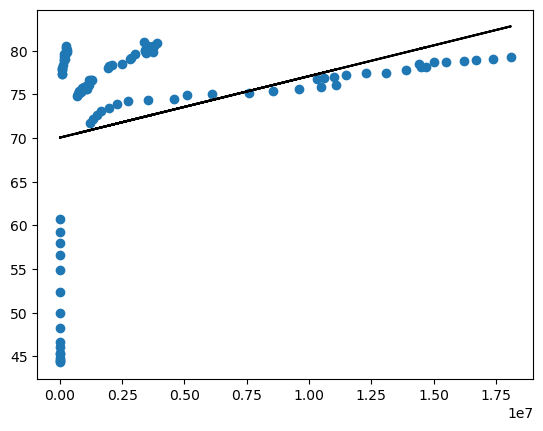

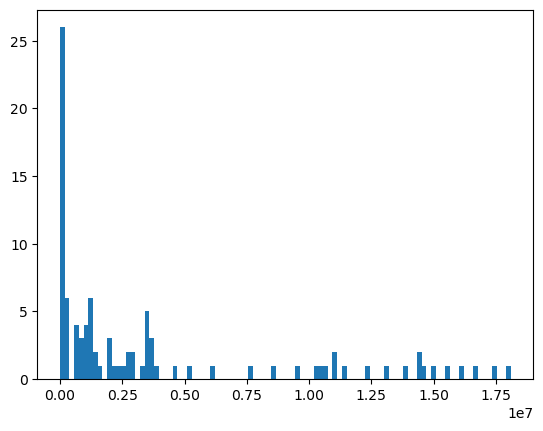

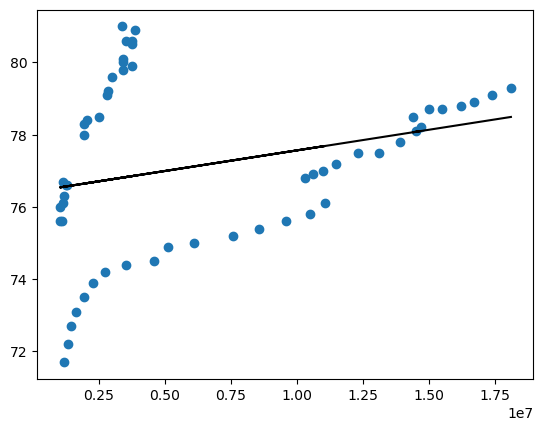

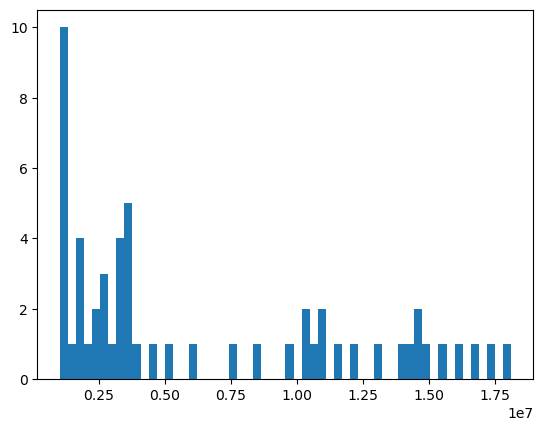

<Figure size 640x480 with 0 Axes>

In [111]:
#we're gonna make statistics summaries & visualizations & hipotesis of 2 columns to answer some questions:

#Is the PIB of a country related to the life expectancy? PIB + years -> 2 quantitative data
df_mill.columns=['country', 'year', 'expectancy', 'PIB']
df_mill['PIB']=df_mill['PIB'].astype('int64')#cambiamos el tipo de dato para hacer bien el gráfico
print(df_mill.columns)

model = sm.OLS.from_formula('expectancy~ PIB', data = df_mill) #creamos una matriz que no vemos
results = model.fit()
plt.scatter(df_mill['PIB'], df_mill['expectancy'])
plt.plot(df_mill.PIB, results.predict(df_mill), color='black') #esta línea traza la línea que representa la media
plt.show()
plt.clf()

#print(df_mill['PIB'].min())
#print(df_mill.PIB.max())

#we must check that residuals have a normal distribution to make inferences
fitteds = results.predict(df_mill)#make a prediction of the PIB knowing the expectancy of age
residuals = df_mill.PIB - fitteds
plt.hist(residuals, bins = len(df_mill))
plt.show()
plt.clf()
#residuals are not not normally distributed, we can not make conclusions

#graph without atipic values
df_mill_reduced = df_mill[df_mill.PIB > 0.1*10**7]
model = sm.OLS.from_formula('expectancy~ PIB', data = df_mill_reduced) #creamos una matriz que no vemos
results = model.fit()
plt.scatter(df_mill_reduced['PIB'], df_mill_reduced['expectancy'])
plt.plot(df_mill_reduced.PIB, results.predict(df_mill_reduced), color='black') #esta línea traza la línea que representa la media
plt.show()
plt.clf()

fitteds = results.predict(df_mill_reduced)#make a prediction of the PIB knowing the expectancy of age
residuals = df_mill_reduced.PIB - fitteds
plt.hist(residuals, bins = len(df_mill_reduced))
plt.show()
plt.clf()
#residuals not normally distributed

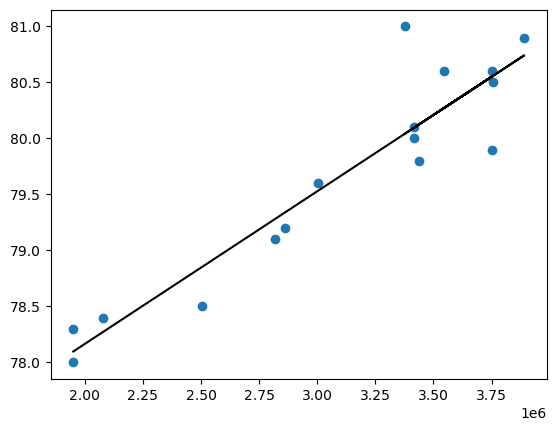

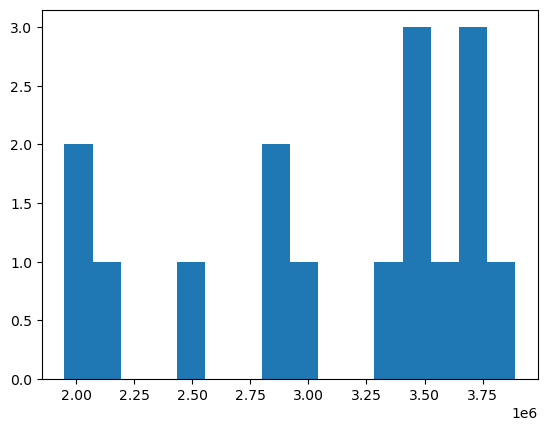

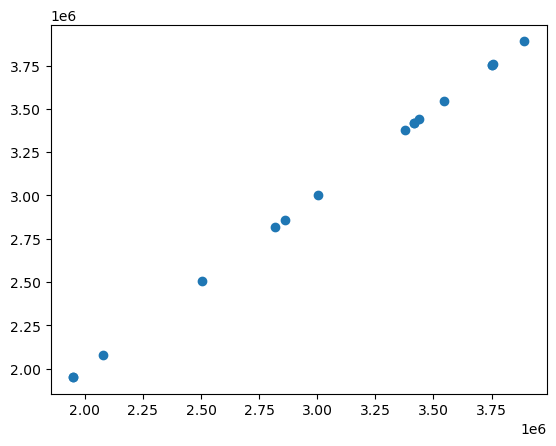

<Figure size 640x480 with 0 Axes>

In [115]:

#Is the PIB of a country related to the life expectancy only on GERMANY? PIB + years -> 2 quantitative data
df_mill_germany = df_mill[df_mill['country']=='Germany']
model = sm.OLS.from_formula('expectancy~ PIB', data = df_mill_germany) #creamos una matriz que no vemos
results = model.fit()
plt.scatter(df_mill_germany['PIB'], df_mill_germany['expectancy'])
plt.plot(df_mill_germany.PIB, results.predict(df_mill_germany), color='black') #esta línea traza la línea que representa la media
plt.show()
plt.clf()

#print(df_mill['PIB'].min())
#print(df_mill.PIB.max())

#we must check that residuals have a normal distribution to make inferences
fitteds = results.predict(df_mill_germany)#make a prediction of the PIB knowing the expectancy of age
residuals = df_mill_germany.PIB - fitteds
plt.hist(residuals, bins = len(df_mill_germany))
plt.show()
plt.clf()
#we dont know if residuals are normally distributed

#we must check if the residual variation is constant: compare residuals with the PIB
plt.scatter(df_mill_germany.PIB, residuals)
plt.show()
plt.clf()
#if a PIB grows x times, it also does the residual, so the variation is constant

#we can conclude that in germany the PIB is related with the expectancy of life, but we can't tho these analysis without taking in mind the contry

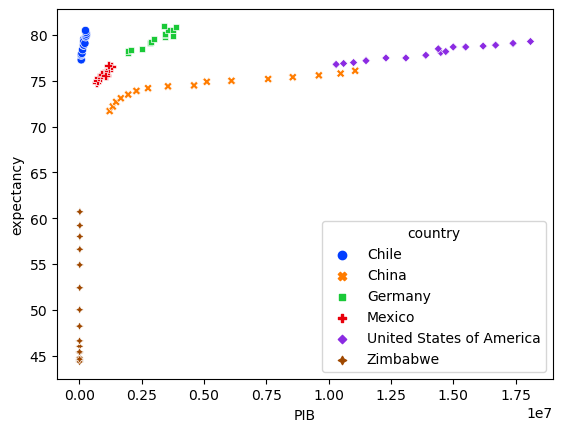

<Figure size 640x480 with 0 Axes>

In [117]:
#we learned that we must anylice each country by itself, so lest finish with a general view of the relation between PIB and life expectancy for each country

sns.scatterplot(x ='PIB', y ='expectancy', hue ='country', style ='country', palette ='bright', data =df_mill)
plt.show()
plt.clf()
#Zimbabwe increased its life expectancy without increasing GDP, which is why when we analyzed all the countries together we could not draw conclusions. Note that in the case of Germany you can see a linear relationship that we have previously verified